In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv(r'C:\Users\Lenovo\Downloads\50_Startups(1).csv')

In [5]:
dataset.isnull().any()

R&D Spend           True
Administration     False
Marketing Spend     True
State               True
Profit             False
dtype: bool

In [6]:
dataset.fillna(dataset.mean(),inplace=True)

In [8]:
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State               True
Profit             False
dtype: bool

In [12]:
dataset["State"].mode()[0]

'California'

In [14]:
dataset.fillna(dataset["State"].mode()[0],inplace=True)

In [15]:
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [26]:
x=dataset.iloc[:,0:4].values

In [27]:
y=dataset.iloc[:,4].values

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
x = onehotencoder.fit_transform(x).toarray()
x = x[:, 1:]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [37]:
import seaborn as sns

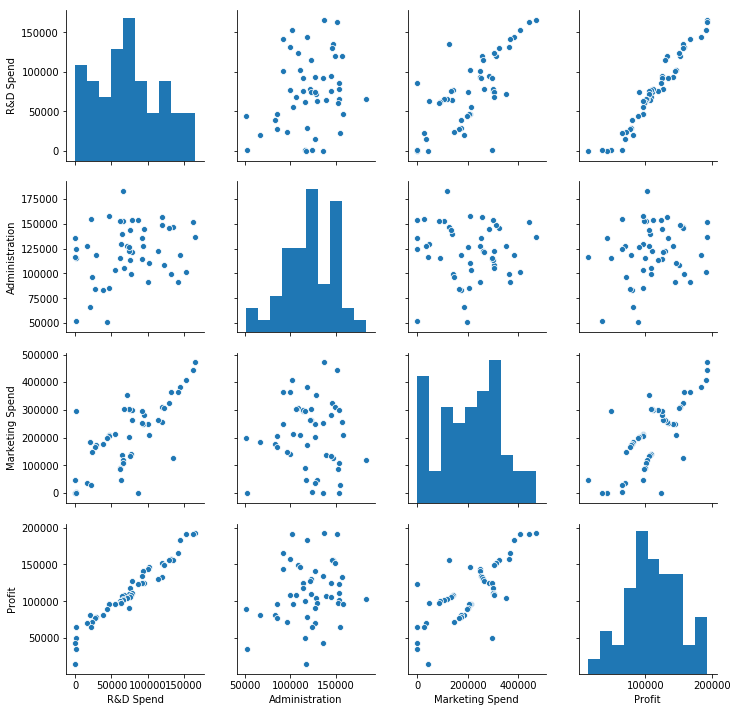

In [38]:
sns.pairplot(dataset)

# Train the model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
mlrmodel=LinearRegression()

In [41]:
mlrmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Test the model

In [42]:
y_pred=mlrmodel.predict(x_test)

In [43]:
y_pred

array([ 98959.7628943 , 132330.79822578, 128688.73297725,  68294.67983769,
       175898.85393148, 117014.21100198,  68875.14297631,  99647.8431717 ,
       110307.17100759, 165291.89755528])

In [44]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [46]:
mlrmodel.predict([[0,1,50000,32300,49299]])

array([86678.41385026])

In [47]:
x_test.shape

(10, 5)

In [48]:
mlrmodel.intercept_

42266.8288385397

In [49]:
mlrmodel.coef_

array([-3.68500995e+03,  2.62761929e+03,  7.85658679e-01,  2.36620433e-02,
        3.52288646e-02])

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test,y_pred)

0.9150012787083242